# **Regression Problem Statement:** Apply Linear Regression model to predict median household values for California districts based off of attributes derived from the 1990 US Census Data.

## *Overview of the data*

In [65]:
# importing dependencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.feature_selection import (SelectPercentile, SelectKBest
                                       , mutual_info_regression, f_regression
                                       , RFE, SelectFromModel, SequentialFeatureSelector
                                       )
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
# loading data

data = fetch_california_housing(as_frame=True)
data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [16]:
data['frame'].head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [17]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [18]:
data.frame.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## *Pre-processing*

In [ ]:
'''
The dataset is clean with all numeric and 0 null values.
Hence proceeding with normalization & feature selection/dimensionality reduction transformations.
'''

### **Normalization:** using MinMaxScaler

In [22]:
scaled_data = MinMaxScaler().fit_transform(data.data)
df = pd.DataFrame(scaled_data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163


### **Feature Selection**

#### *1. Filter based selection*

##### **Mutual Information**

In [79]:
# Scoring function as 'Mutual Information' with SelectKBest as the transformer

x, y = df, data.target

# Since no. of features is less, looping through all possible k values to find the optimal no. of features

scores = {'Features':[],'R2':[],'MSE':[]}

for k in range(1, x.shape[1]+1):
    selector = SelectKBest(mutual_info_regression, k=k)
    x_new = selector.fit_transform(x, y)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores['Features'].append(k)
    scores['R2'].append(r2_score(y_test, y_pred))
    scores['MSE'].append(mean_squared_error(y_test, y_pred))

scores_df = pd.DataFrame(scores)
scores_df

,Features,R2,MSE
0,1,0.002563,1.309364
1,2,0.480692,0.681711
2,3,0.596642,0.529499
3,4,0.596777,0.529322
4,5,0.597735,0.528064
5,6,0.603490,0.520510
6,7,0.617907,0.501584
7,8,0.617935,0.501548


In [ ]:
'''
k=6 results in the best R2 score (59.6%)
However nearly similar R2 scores are achieved with k=8/6/4 (61.7%, 60.3%, 59.6% respectively)
Hence choosing k=3 as the optimal value considering it provides comparative R2 with way less computational cost

'''

In [135]:
# k = 3

selector = SelectKBest(mutual_info_regression, k=3).fit(x, y)
x_new = selector.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_mi = r2_score(y_test, y_pred)
mse_mi = mean_squared_error(y_test, y_pred)
print(r2_mi, mse_mi)
print(selector.get_feature_names_out())

0.5966422848492987 0.5294990100206679
['MedInc' 'Latitude' 'Longitude']


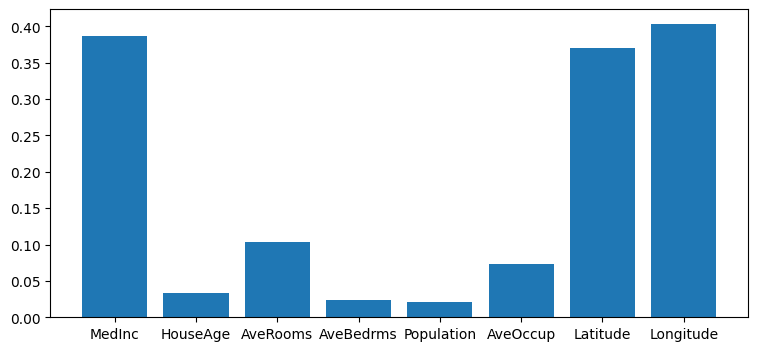

In [37]:
plt.figure(figsize=(9, 4))
plt.bar(data.feature_names, selector.scores_)
plt.show()

##### **Pearson's Correlation:** Univariate analysis

In [120]:
# Scoring function as f_test with SelectKBest as the transformer

x, y = df, data.target

# Since no. of features is less, looping through all possible k values to find the optimal no. of features

scores = {'Features':[],'R2':[],'MSE':[]}

for k in range(1, x.shape[1]+1):
    selector = SelectKBest(f_regression, k=k)
    x_new = selector.fit_transform(x, y)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores['Features'].append(k)
    scores['R2'].append(r2_score(y_test, y_pred))
    scores['MSE'].append(mean_squared_error(y_test, y_pred))

scores_df = pd.DataFrame(scores)
scores_df

,Features,R2,MSE
0,1,0.478645,0.684397
1,2,0.488327,0.671688
2,3,0.492900,0.665684
3,4,0.521152,0.628598
4,5,0.549686,0.591140
5,6,0.616850,0.502971
6,7,0.616906,0.502898
7,8,0.617935,0.501548


In [ ]:
'''
Selecting k=6 for providing near best R2 (61.7%) with minimal features

'''

In [123]:
# k = 6

selector = SelectKBest(f_regression, k=6).fit(x, y)
x_new = selector.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_ft = r2_score(y_test, y_pred)
mse_ft = mean_squared_error(y_test, y_pred)
print(r2_ft, mse_ft)
print(selector.get_feature_names_out())

0.6168502170500987 0.5029714894279587
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Latitude' 'Longitude']


##### **Pearson's Correlation:** Unsupervised analysis

<Axes: >

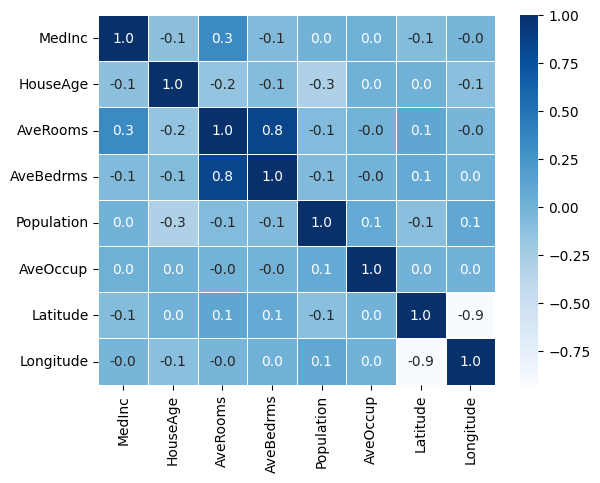

In [44]:
# drawing correlation heatmap

sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='Blues', fmt='.1f')

In [ ]:
'''
High collinearity is seen b/w 'AveRooms' and 'AveBedrms'
Hence, removing either feature based on lesser correlation with target

'''

<Axes: >

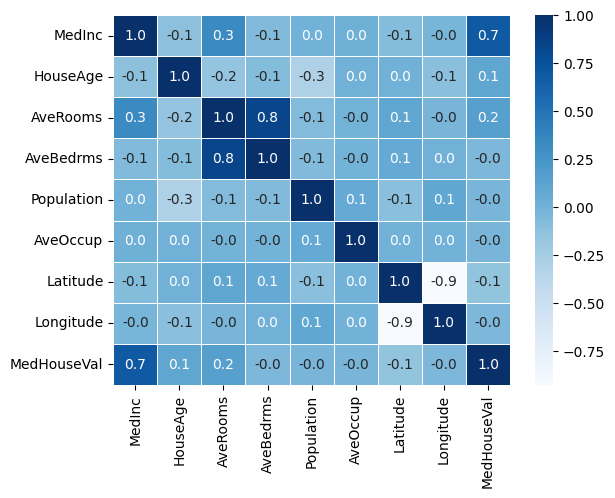

In [129]:
sns.heatmap(data.frame.corr(), annot=True, linewidth=0.5, cmap='Blues', fmt='.1f')

In [127]:
# Dropping 'AveBedrms' to deal with multicollonearity, since it shows minimal correlation with the target
# Further dropping 'AveOccup' & 'Population' due to minimal correlation with the target

x, y = df, data.target
x_new = df.drop(columns=['AveBedrms', 'AveOccup', 'Population'])

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_hmap = r2_score(y_test, y_pred)
mse_hmap = mean_squared_error(y_test, y_pred)
print(r2_hmap, mse_hmap)

0.6024967013889286 0.5218137528765855


#### *2. Wrapper based selection*

##### **Recursive Feature Elimination**

In [85]:
# Using unscaled data & Lasso estimator

x, y = data.data, data.target

# looping for all possible n_features_to_select

scores = {'Features':[],'R2':[],'MSE':[]}

for n in range(1, x.shape[1]+1):
    estimator = Lasso()
    selector = RFE(estimator, n_features_to_select=n, step=1)
    x_new = selector.fit_transform(x, y)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores['Features'].append(n)
    scores['R2'].append(r2_score(y_test, y_pred))
    scores['MSE'].append(mean_squared_error(y_test, y_pred))

scores_df = pd.DataFrame(scores)
scores_df

,Features,R2,MSE
0,1,0.478645,0.684397
1,2,0.511034,0.641879
2,3,0.511595,0.641143
3,4,0.512216,0.640328
4,5,0.602285,0.522091
5,6,0.603251,0.520824
6,7,0.608316,0.514174
7,8,0.617935,0.501548


In [ ]:
'''
Selecting the optimal no. of features as n_features_to_select = 5 for providing near highest R2 (60.2%)

'''

In [86]:
# n_features_to_select = 5

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(x, y)
x_new = selector.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_rfe = r2_score(y_test, y_pred)
mse_rfe = mean_squared_error(y_test, y_pred)
print(r2_rfe, mse_rfe)
print(selector.get_feature_names_out())

0.6022853742843872 0.5220911679065755
['MedInc' 'HouseAge' 'Population' 'Latitude' 'Longitude']


##### **Select From Model**

In [97]:
# Using Ridge as the estimator

x, y = df, data.target

estimator = Ridge().fit(x, y)
selector = SelectFromModel(estimator, threshold='mean', prefit=True).fit(x, y)

x_new = selector.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_sfm = r2_score(y_test, y_pred)
mse_sfm = mean_squared_error(y_test, y_pred)
print(r2_sfm, mse_sfm)
print(selector.get_feature_names_out())

0.601272717825186 0.5234205105037234
['MedInc' 'AveBedrms' 'Latitude' 'Longitude']


##### **Sequential Feature Selection**

In [103]:
x, y = df, data.target

estimator = Ridge()

selector = SequentialFeatureSelector(estimator, n_features_to_select='auto', direction='backward').fit(x, y)
x_new = selector.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_sfs = r2_score(y_test, y_pred)
mse_sfs = mean_squared_error(y_test, y_pred)

print(r2_sfs, mse_sfs)
print(selector.get_feature_names_out())

0.6021845127507547 0.5222235716767318
['MedInc' 'HouseAge' 'Latitude' 'Longitude']


#### *3. Intrinsic/Embedded selection*

##### **L1 Regularization**

In [108]:
x, y = df, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

model = LassoCV()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_l1 = r2_score(y_test, y_pred)
mse_l1 = mean_squared_error(y_test, y_pred)

print(r2_l1, mse_l1)

print(model.coef_)
print(model.intercept_)
print(model.score(x, y))

0.6146194392577586 0.5058998941373588
[ 5.92239200e+00  5.15544168e-01 -8.19426271e+00  1.36318140e+01
 -8.48109452e-03 -2.98503123e+00 -4.06504002e+00 -4.42208440e+00]
3.8161304805574856
0.6045843959406262


### **Dimensionality Reduction**

#### *Principal Component Analysis*

In [110]:

x, y = df, data.target

scores = {'Features':[],'R2':[],'MSE':[]}

for n in range(1, x.shape[1]+1):
    pca = PCA(n_components=n, svd_solver='full')
    x_new = pca.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores['Features'].append(n)
    scores['R2'].append(r2_score(y_test, y_pred))
    scores['MSE'].append(mean_squared_error(y_test, y_pred))

scores_df = pd.DataFrame(scores)
scores_df

,Features,R2,MSE
0,1,0.002848,1.308989
1,2,0.008536,1.301522
2,3,0.537743,0.606818
3,4,0.601010,0.523765
4,5,0.601679,0.522887
5,6,0.604129,0.519671
6,7,0.605019,0.518502
7,8,0.617935,0.501548


In [ ]:
'''
Selecting n_components = 4 for providing near best R2 (60.1%)

'''

In [112]:
# n_components = 4

x_new = PCA(n_components=4, svd_solver='full').fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_pca = r2_score(y_test, y_pred)
mse_pca = mean_squared_error(y_test, y_pred)

print(r2_pca, mse_pca)

0.6010104969589005 0.5237647352052468


### **Revisiting each method by setting threshold of 4 features for later evaluation**

In [137]:
# Mutual Information for Regression

# k = 4

selector = SelectKBest(mutual_info_regression, k=4).fit(x, y)
x_new = selector.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_mi4 = r2_score(y_test, y_pred)
mse_mi4 = mean_squared_error(y_test, y_pred)
print(r2_mi4, mse_mi4)
print(selector.get_feature_names_out())

0.5967772142621022 0.5293218843879638
['MedInc' 'AveRooms' 'Latitude' 'Longitude']


In [138]:
# f_Regression

# k = 4

selector = SelectKBest(f_regression, k=4).fit(x, y)
x_new = selector.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_ft4 = r2_score(y_test, y_pred)
mse_ft4 = mean_squared_error(y_test, y_pred)
print(r2_ft4, mse_ft4)
print(selector.get_feature_names_out())

0.5211517333568013 0.628597578809063
['MedInc' 'HouseAge' 'AveRooms' 'Latitude']


In [139]:
# Feature vs Feature Correlation: Heatmap

# Dropping 'AveBedrms' to deal with multicollonearity, since it shows minimal correlation with the target
# Further dropping 'HouseAge', 'AveOccup' & 'Population' due to minimal correlation with the target

x, y = df, data.target
x_new = df.drop(columns=['HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Population'])

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_hmap4 = r2_score(y_test, y_pred)
mse_hmap4 = mean_squared_error(y_test, y_pred)
print(r2_hmap4, mse_hmap4)

0.5966422848492987 0.5294990100206679


In [151]:
# RFE

# n_features_to_select = 4

x, y = data.data, data.target

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=4, step=1).fit(x, y)
x_new = selector.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2_rfe4 = r2_score(y_test, y_pred)
mse_rfe4 = mean_squared_error(y_test, y_pred)
print(r2_rfe4, mse_rfe4)
print(selector.get_feature_names_out())

0.5122160873822021 0.6403276524378213
['MedInc' 'HouseAge' 'Population' 'Longitude']


In [145]:
# SFM

r2_sfm4 = r2_sfm
mse_sfm4 = mse_sfm
print(r2_sfm4, mse_sfm4)

0.601272717825186 0.5234205105037234


In [146]:
# SFS

r2_sfs4 = r2_sfs
mse_sfs4 = mse_sfs
print(r2_sfs4, mse_sfs4)

0.6021845127507547 0.5222235716767318


In [147]:
# PCA

r2_pca4 = r2_pca
mse_pca4 = mse_pca
print(r2_pca4, mse_pca4)

0.6010104969589005 0.5237647352052468


### **Fitting without feature selection**

In [153]:
x, y = df, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2, mse)

0.617934713610025 0.5015478403113495


## *Evaluation*

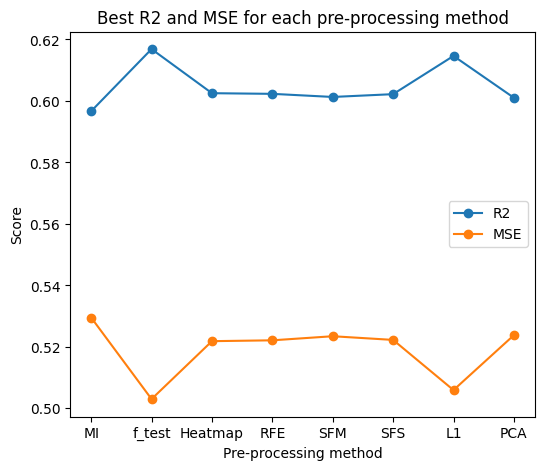

In [182]:
# Plotting best r2 scores and mse for each pre-processing method

r2_scores = [r2_mi, r2_ft, r2_hmap, r2_rfe, r2_sfm, r2_sfs, r2_l1, r2_pca]
mse_scores = [mse_mi, mse_ft, mse_hmap, mse_rfe, mse_sfm, mse_sfs, mse_l1, mse_pca]
labels = ['MI', 'f_test', 'Heatmap', 'RFE', 'SFM', 'SFS', 'L1', 'PCA']

plt.figure(figsize=(6, 5))
plt.plot(labels, r2_scores, marker='o', label='R2')
plt.plot(labels, mse_scores, marker='o', label='MSE')
plt.legend()
plt.title("Best R2 and MSE for each pre-processing method")
plt.xlabel("Pre-processing method")
plt.ylabel("Score")
plt.show()

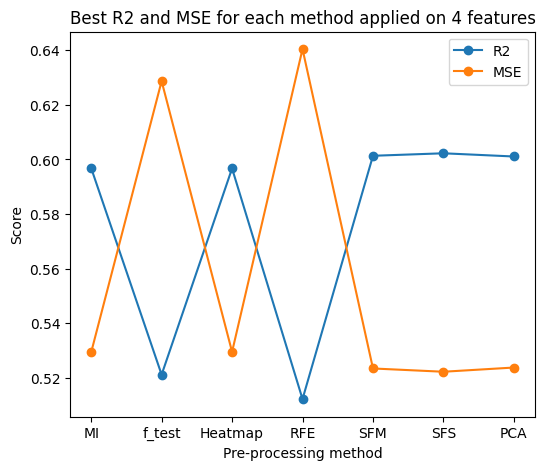

In [184]:
# Plotting r2 scores and mse for each method, where no. of features were limited to 4

r2_scores = [r2_mi4, r2_ft4, r2_hmap4, r2_rfe4, r2_sfm, r2_sfs, r2_pca]
mse_scores = [mse_mi4, mse_ft4, mse_hmap4, mse_rfe4, mse_sfm, mse_sfs, mse_pca]
labels = ['MI', 'f_test', 'Heatmap', 'RFE', 'SFM', 'SFS', 'PCA']

plt.figure(figsize=(6, 5))
plt.plot(labels, r2_scores, marker='o', label='R2')
plt.plot(labels, mse_scores, marker='o', label='MSE')
plt.legend()
plt.title("Best R2 and MSE for each method applied on 4 features")
plt.xlabel("Pre-processing method")
plt.ylabel("Score")
plt.show()

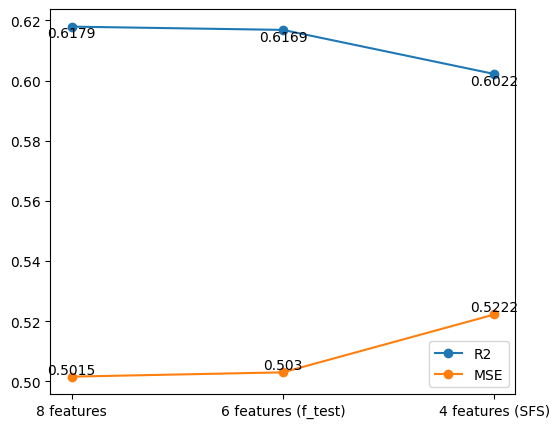

In [191]:
# Plotting 'No feature selection' vs 'Best of 6 features' vs 'Best of 4 features'

r2_scores = [r2, r2_ft, r2_sfs4]
mse_scores = [mse, mse_ft, mse_sfs4]
labels = ['8 features', '6 features (f_test)', '4 features (SFS)']

plt.figure(figsize=(6, 5))
plt.plot(labels, r2_scores, marker='o', label='R2')
plt.plot(labels, mse_scores, marker='o', label='MSE')
for a, b in zip(labels, r2_scores):
    plt.text(a, b, str(round(b, 4)), va='top', ha='center')
for a, b in zip(labels, mse_scores):
    plt.text(a, b, str(round(b, 4)), va='bottom', ha='center')
plt.legend()
plt.show()

## *Result*

### **Feature selection through f_test (Pearson's correlation) on scaled data (MinMaxScaler) provided the best accuracy (R2 = 61.69%, MSE = 0.5029) with minimal computational cost (k = 6)**

### **If the feature threshold is set to 4, feature selection through SFS provides near to best accuracy (R2 = 60.22%, MSE = 0.5222)**

### **Summarized Results**

In [196]:
results = {'method': ["Without feature selection (features=8)", "f_regression transformer (k=6)", "SFS transformer (n=4)"]
           , 'R2 Score': [r2, r2_ft, r2_sfs4]
           , 'MSE': [mse, mse_ft, mse_sfs4]}

df_results = pd.DataFrame(results)
df_results

,method,R2 Score,MSE
0,Without feature selection (features=8),0.617935,0.501548
1,f_regression transformer (k=6),0.616850,0.502971
2,SFS transformer (n=4),0.602185,0.522224
